# Practice Exercise: Hierarchical Clustering

## Scenario:
You’re analyzing customer spending patterns and have two features:
1. **Monthly Purchases**: Number of items purchased per month.
2. **Total Spending**: Total dollars spent per month.

Use hierarchical clustering to:
1. Group customers based on their spending patterns.
2. Visualize the dendrogram.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

customers = pd.DataFrame({
    "Monthly Purchases": [1, 2, 5, 8, 10, 50, 55, 60],
    "Total Spending": [100, 200, 450, 800, 1000, 2500, 2600, 3000]
})

customers

,Monthly Purchases,Total Spending
0,1,100
1,2,200
2,5,450
3,8,800
4,10,1000
5,50,2500
6,55,2600
7,60,3000


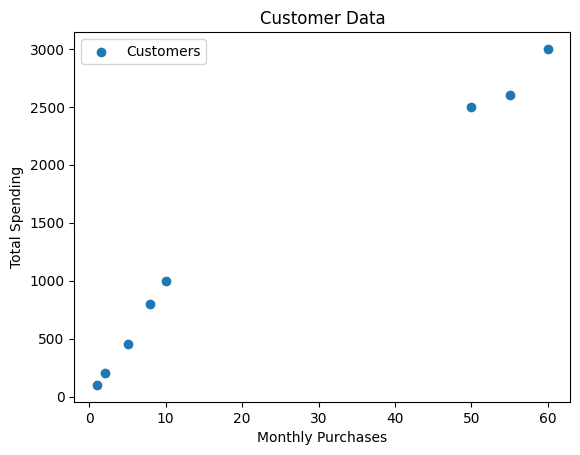

In [2]:
# Visualize the data
plt.scatter(customers["Monthly Purchases"], customers["Total Spending"], label = 'Customers')

plt.title('Customer Data')
plt.xlabel('Monthly Purchases')
plt.ylabel('Total Spending')
plt.legend()
plt.show()

In [3]:
# Hierarchical Clustering
linked = linkage(customers, 'ward')
linked

array([[0.00000000e+00, 1.00000000e+00, 1.00005000e+02, 2.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 1.00124922e+02, 2.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 2.00010000e+02, 2.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 3.46433736e+02, 3.00000000e+00],
       [7.00000000e+00, 9.00000000e+00, 5.19687406e+02, 3.00000000e+00],
       [1.00000000e+01, 1.10000000e+01, 1.00702347e+03, 5.00000000e+00],
       [1.20000000e+01, 1.30000000e+01, 4.24201310e+03, 8.00000000e+00]])

In [13]:
# You can mix and choose when calling linkage to use different methods and metrics
linked_manhattan = linkage(customers, method='average', metric='cityblock')  # Manhattan Distance
linked_cosine = linkage(customers, method='average', metric='cosine')  # Cosine Similarity

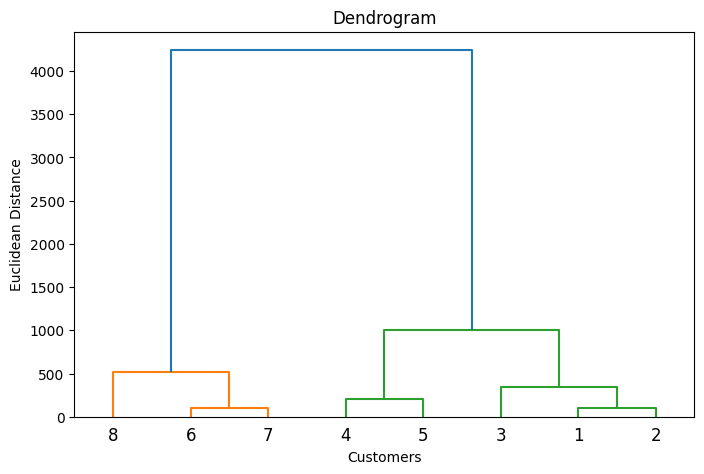

In [ ]:
# Dendrogram
plt.figure(figsize=(8, 5)) # change the size of the plot
dendrogram(linked, labels = range(1, len(customers) + 1))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

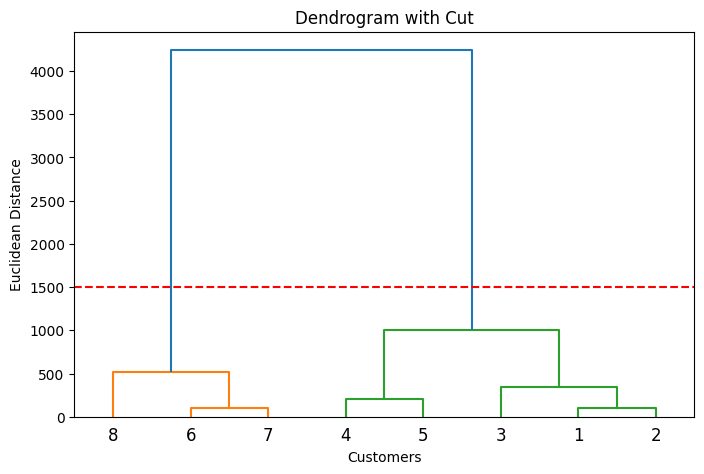

In [10]:
plt.figure(figsize=(8, 5))
dendrogram(linked, labels=range(1, len(customers) + 1))
plt.axhline(y=1500, color='red', linestyle='--')  # Add a horizontal line
plt.title('Dendrogram with Cut')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

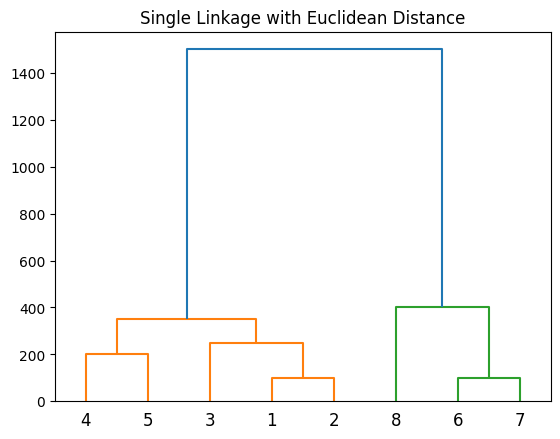

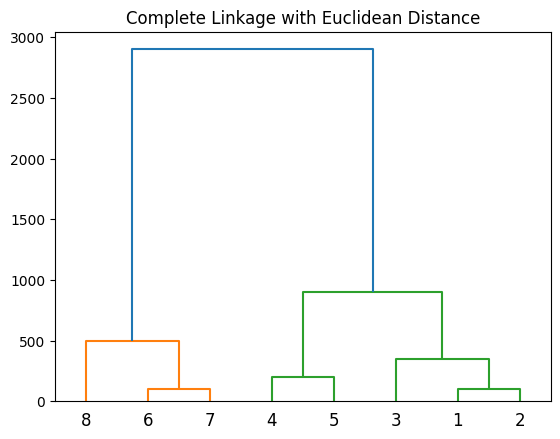

   Monthly Purchases  Total Spending  Cluster
0                  1             100        2
1                  2             200        2
2                  5             450        2
3                  8             800        2
4                 10            1000        2
5                 50            2500        1
6                 55            2600        1
7                 60            3000        1


In [14]:
from scipy.cluster.hierarchy import fcluster

# Single Linkage with Euclidean Distance
linked_single = linkage(customers, method='single')
plt.figure()
dendrogram(linked_single, labels=range(1, len(customers) + 1))
plt.title('Single Linkage with Euclidean Distance')
plt.show()

# Complete Linkage with Euclidean Distance
linked_complete = linkage(customers, method='complete')
plt.figure()
dendrogram(linked_complete, labels=range(1, len(customers) + 1))
plt.title('Complete Linkage with Euclidean Distance')
plt.show()

# Extracting clusters from Ward’s dendrogram (Cut at height 1500)
cluster_labels = fcluster(linked, t=1500, criterion='distance')
customers["Cluster"] = cluster_labels
print(customers)